# **Optical camera communications image processing for receiver**

> Python script for the image processing part of the receiver of an optical camera comuunication system.

> The objective is to demodulate a message, using on-off keying modulation/demodulation.

> The python script will import an image and try to demodulate it by image processing methods.

> The python script will be executed on a Raspberry pi 4 or a pc.

# **Necessary imports**

In [3]:
import numpy as np
import cv2
import sys
import cv2
import matplotlib.pyplot as plt

# **Import the image**

In [4]:
# read the video
cap = cv2.VideoCapture(0)

if (cap.isOpened()== False):
    print("Error opening video camera")

start = 0
end = 0
start_list = []
start_sequence = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0]
end_sequence = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
message_list = []
N = len(start_sequence)

# Read until video is completed
while(cap.isOpened()):
     
# Capture frame-by-frame
    ret, frame = cap.read()
    if ret == True:

        # detection procedure and frame cropping

        grayframe = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        (thresh, bnwFrame) = cv2.threshold(grayframe, 127, 255, cv2.THRESH_BINARY)
        
        if end == 1:
            break

        if start == 0:
            # put the data of the frame inside the start_list
            # if list_size >= 30 check the last 30 elements
            # if last 30 elements are the starting sequence start = 1
            if len(start_list) >= N:
                if start_list[-N:] == start_sequence:
                    start = 1
        elif start == 1:
            # start storing the bits to the message list
            # ___procedure___
            bit = 1
            message_list.append(bit)
            # ___procedure___
            # check for end sequence the last 30 bits
            # if it's the end end = 1
            if end_sequence == message_list[-N:]:
                end = 1
        


        


        # counting the number of pixels
        # number_of_white_pix = np.sum(bnwFrame == 255)
        # number_of_black_pix = np.sum(bnwFrame == 0)
        # print('Number of white pixels:', number_of_white_pix)
        # print('Number of black pixels:', number_of_black_pix)

        # show useful part of the frame
        # y_min = 200
        # y_max = 900
        # x_min = 600
        # x_max = 1300
        # useful_frame = bnwFrame[y_min:y_max, x_min:x_max]
        # row_num = y_max - y_min
        # col_num = x_max - x_min
        # holder = []
        # for y in range(row_num):
        #   row = useful_frame[y, 0:col_num-1]
        #   sum = np.sum(row == 255)
        #   holder.append(sum)
        # new = np.array(holder)
        # # print(holder)
        # x = np.arange(1, row_num)
        # # print(x)
        # plt.plot(new)
        # plt.ylabel('Number of white pixels')
        # plt.xlabel('Row number')
        # plt.show()
        # print(useful_frame.shape)
        cv2.imshow('frame', bnwFrame)
         
    # Press Q on keyboard to exit
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
 
# Break the loop
    else:
        break

# When everything done, release
# the video capture object
cap.release()
 
# Closes all the frames
cv2.destroyAllWindows()

# extract the last 30 bits
# convert binary to jpg, png, mp3, raw, text...
# show the received message

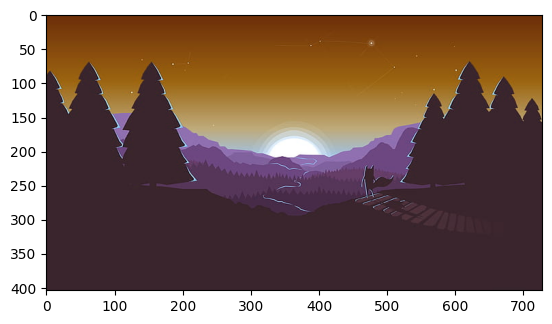

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
img = cv2.imread("pic.jpg", cv2.IMREAD_COLOR) 
plt.imshow(img)

In [8]:
start_sequence = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0]
temp = []
for i in range(29):
    temp.append(1)
temp.append(0)
N = 5

if start_sequence == temp:
    print("equal")
elif start_sequence != temp:
    print("not equal")
a = start_sequence[-N:]
print(a)
print(len(start_sequence))

equal
[1, 1, 1, 1, 0]
30
